<a href="https://colab.research.google.com/github/SmritiSalujaa/nyc-taxi-trip-time-prediction-project-/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [1]:
import pandas as pd #data processing
import numpy as np  #linear algebra

#data visualisation
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import datetime as dt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df= pd.read_csv('/content/drive/MyDrive/ml/NYC Taxi Data.csv')
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [4]:
df.head() 

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
print ('No. of Examples(rows): ',df.shape[0])
print ('No. of Features(columns) : ', df.shape[1])



No. of Examples(rows):  1458644
No. of Features(columns) :  11


In [6]:
#Columns in our data

df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

Independent Variables

id — a unique identifier for each trip
vendor_id — a code indicating the provider associated with the trip record
pickup_datetime — date and time when the meter was engaged
dropoff_datetime — date and time when the meter was disengaged
passenger_count — the number of passengers in the vehicle (driver entered value)
pickup_longitude — the longitude where the meter was engaged
pickup_latitude — the latitude where the meter was engaged
dropoff_longitude — the longitude where the meter was disengaged
dropoff_latitude — the latitude where the meter was disengaged
store_and_fwd_flag — This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server — Y=store and forward; N=not a store and forward trip.
Target Variable

trip_duration — duration of the trip in seconds

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [8]:
df.duplicated().sum() 

0

In [9]:
df.isnull().sum() 

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [10]:
print(df.nunique().sort_values()) 

vendor_id                   2
store_and_fwd_flag          2
passenger_count            10
trip_duration            7417
pickup_longitude        23047
dropoff_longitude       33821
pickup_latitude         45245
dropoff_latitude        62519
pickup_datetime       1380222
dropoff_datetime      1380377
id                    1458644
dtype: int64


In [11]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


Text(0.5, 1.0, 'Descriptive Stats')

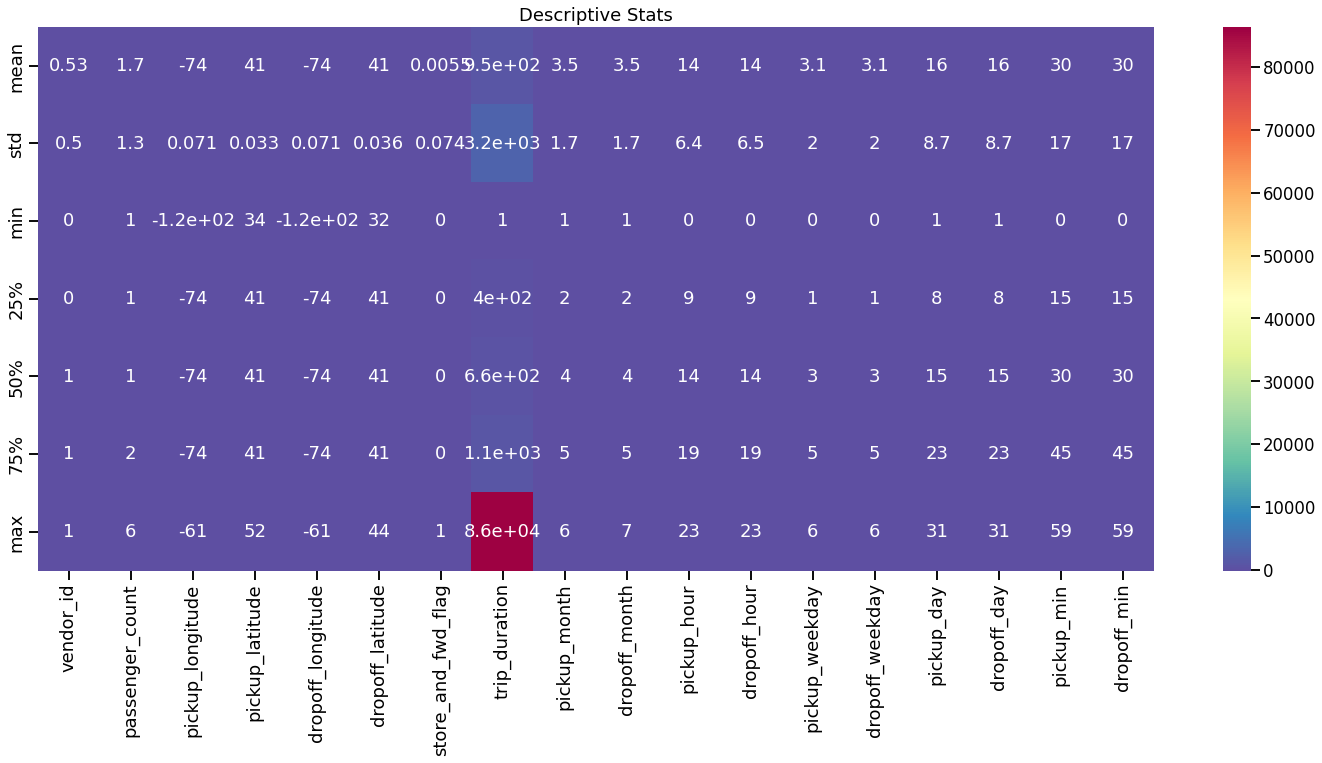

In [84]:

plt.figure(figsize=(25,10))
svm = sns.heatmap(df.describe()[1:], annot=True, cmap='Spectral_r',annot_kws={"size": 18})
svm.set_xticklabels(svm.get_xmajorticklabels(), fontsize = 18)
svm.set_yticklabels(svm.get_ymajorticklabels(), fontsize = 18)

plt.title('Descriptive Stats')

In [13]:

df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])

In [14]:
df['pickup_month'] = df['pickup_datetime'].dt.month
df['dropoff_month']=df['dropoff_datetime'].dt.month

df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['dropoff_hour']=df['dropoff_datetime'].dt.hour

df['pickup_weekday'] = df['pickup_datetime'].dt.weekday
df['dropoff_weekday']=df['dropoff_datetime'].dt.weekday

df['pickup_day'] = df['pickup_datetime'].dt.day
df['dropoff_day']=df['dropoff_datetime'].dt.day

df['pickup_date'] = df['pickup_datetime'].dt.date

df['pickup_min'] = df['pickup_datetime'].dt.minute
df['dropoff_min'] = df['dropoff_datetime'].dt.minute

The Date and time columns in the Dataset has whole lot story to tell, we have to fetch them as separate features.
We do not have to extract pickup and dropoff time both, as they may lead to strong positive correlation between them. (For analysis purpose obviosly we can extract)
Further we can use these columns for Analysis.
Now let us apply this function and create new columns in the dataset.

In [15]:
from geopy.distance import great_circle

#Calculate distance and assign new column to the dataframe.

In [16]:
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
 
 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)
 
 return great_circle(start_coordinates,stop_coordinates).km

In [17]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_month,pickup_hour,dropoff_hour,pickup_weekday,dropoff_weekday,pickup_day,dropoff_day,pickup_date,pickup_min,dropoff_min
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,3,17,17,0,0,14,14,2016-03-14,24,32
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6,0,0,6,6,12,12,2016-06-12,43,54
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,1,11,12,1,1,19,19,2016-01-19,35,10
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4,19,19,2,2,6,6,2016-04-06,32,39
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,3,13,13,5,5,26,26,2016-03-26,30,38


In [18]:
#Check the type of each variable
df.dtypes.reset_index()

,index,0
0,id,object
1,vendor_id,int64
2,pickup_datetime,datetime64[ns]
3,dropoff_datetime,datetime64[ns]
4,passenger_count,int64
5,pickup_longitude,float64
6,pickup_latitude,float64
7,dropoff_longitude,float64
8,dropoff_latitude,float64
9,store_and_fwd_flag,object


EDA

Text(0.5, 1.0, 'Vendor ID')

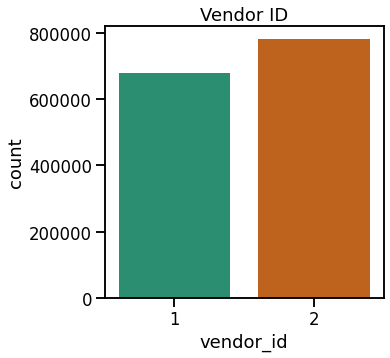

In [19]:
#vendor_id - a code indicating the provider associated with the trip record

sns.set_context('talk')

plt.figure(figsize=(5,5))
sns.countplot(df['vendor_id'], palette='Dark2')
plt.title("Vendor ID")

In [20]:
df['store_and_fwd_flag'].value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

Text(0.5, 1.0, 'Store and Forward Flag')

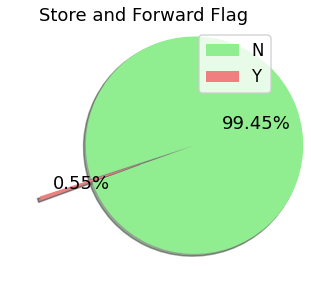

In [21]:
plt.figure(figsize=(5,5))
plt.pie(df['store_and_fwd_flag'].value_counts(), colors=['lightgreen', 'lightcoral'], shadow=True, explode=[0.5,0], autopct='%1.2f%%', startangle=200)
plt.legend(labels=['N','Y'])
plt.title("Store and Forward Flag")

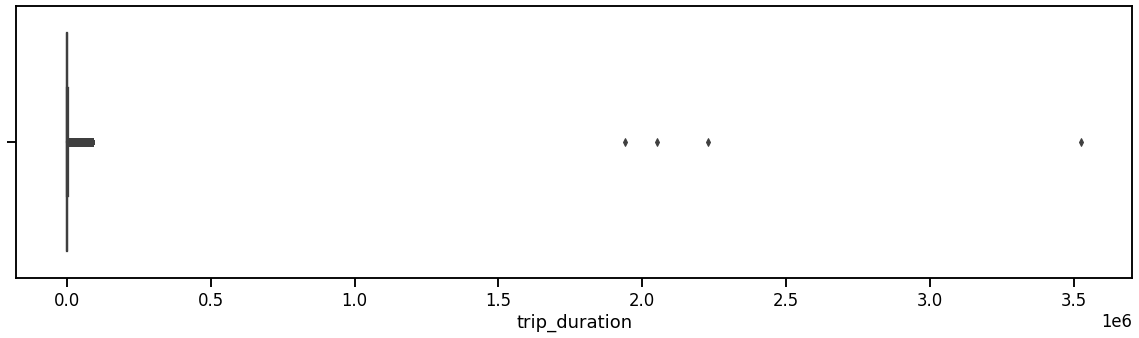

In [22]:
#Visualising Trip duration

plt.figure(figsize=(20,5))
sns.boxplot(df['trip_duration'])

In [23]:
df['trip_duration'].sort_values(ascending=False) #lets see trip duration column in descending order

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
            ...   
269418           1
467645           1
533799           1
726971           1
311745           1
Name: trip_duration, Length: 1458644, dtype: int64

In [24]:
#Dropping these 4 rows

df.drop(df[df['trip_duration'] == 3526282].index, inplace = True)
df.drop(df[df['trip_duration'] == 2227612].index, inplace = True)
df.drop(df[df['trip_duration'] == 2049578].index, inplace = True)
df.drop(df[df['trip_duration'] == 1939736].index, inplace = True)

In [25]:
df.shape


(1458640, 22)

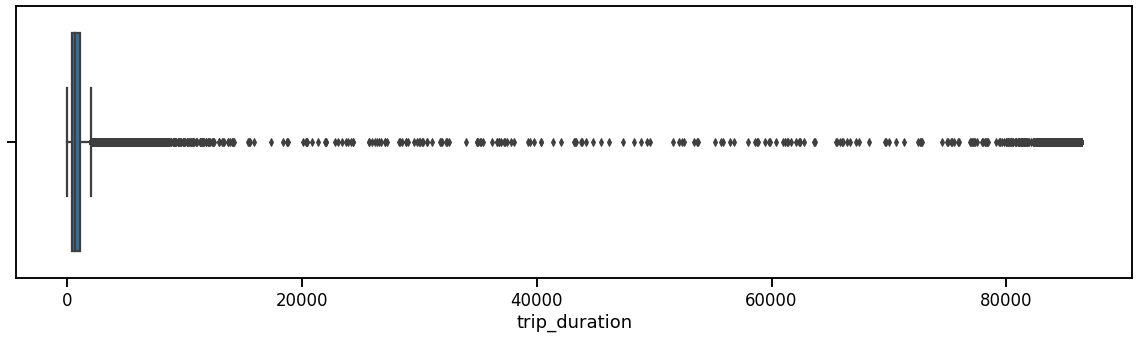

In [26]:
plt.figure(figsize=(20,5))
sns.boxplot(df['trip_duration'])

In [27]:
df.passenger_count.value_counts()

1    1033537
2     210317
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [28]:
# Let us remove the rows which have 0 or 7 or 9 passenger count.
df = df[df['passenger_count'] > 0]
df = df[df['passenger_count'] <= 6]

df.passenger_count.value_counts()

1    1033537
2     210317
5      78088
3      59896
6      48333
4      28404
Name: passenger_count, dtype: int64

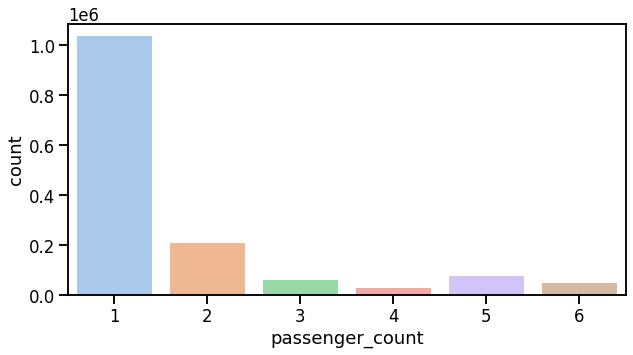

In [29]:
#Passenger count
plt.figure(figsize=(10,5))

sns.countplot(df['passenger_count'], palette='pastel')

In [ ]:
# Distance

plt.figure(figsize = (20,5))
sns.boxplot(df.distance)
plt.show()

Text(0, 0.5, 'Counts')

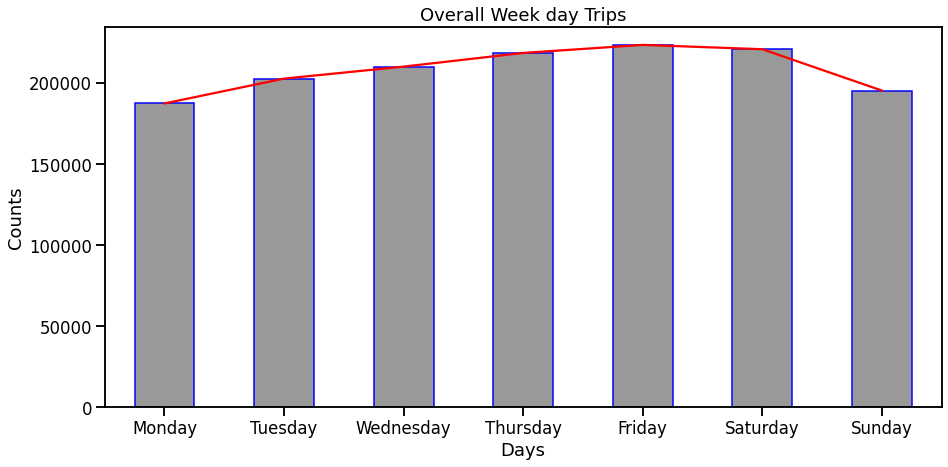

In [31]:
#Analyzing week day trips

plt.figure(figsize=(15,7))
pickup_week = df['pickup_weekday'].value_counts()
pickup_week.sort_index().plot(kind='bar',edgecolor='blue',color = '0.6')
pickup_week.sort_index().plot(kind='line',color = 'red')

plt.xticks(ticks=[0,1,2,3,4,5,6], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=0)
plt.title('Overall Week day Trips')
plt.xlabel('Days')
plt.ylabel('Counts')


Text(0, 0.5, 'Counts')

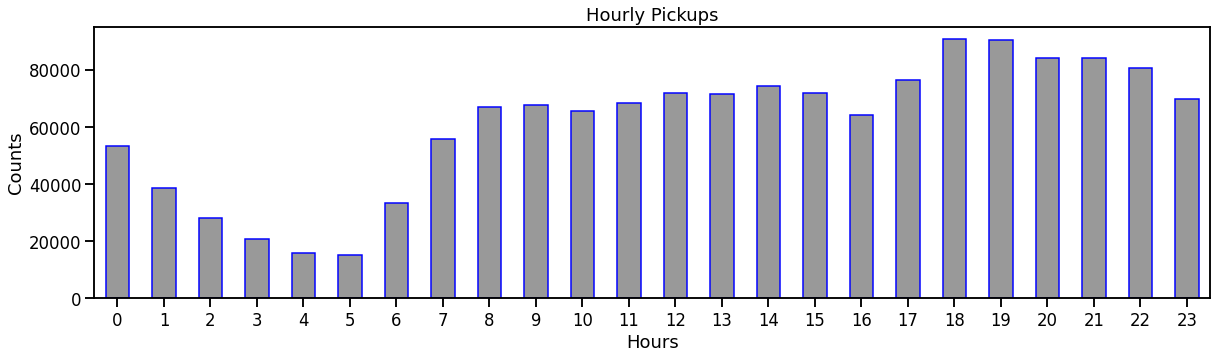

In [32]:
#Analyzing hourly pickups

plt.figure(figsize=(20,5))
pickup_hour = df['pickup_hour'].value_counts()
pickup_hour.sort_index().plot(kind='bar',edgecolor='blue',color = '0.6')
plt.xticks(rotation=0)

plt.title("Hourly Pickups")
plt.xlabel('Hours')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

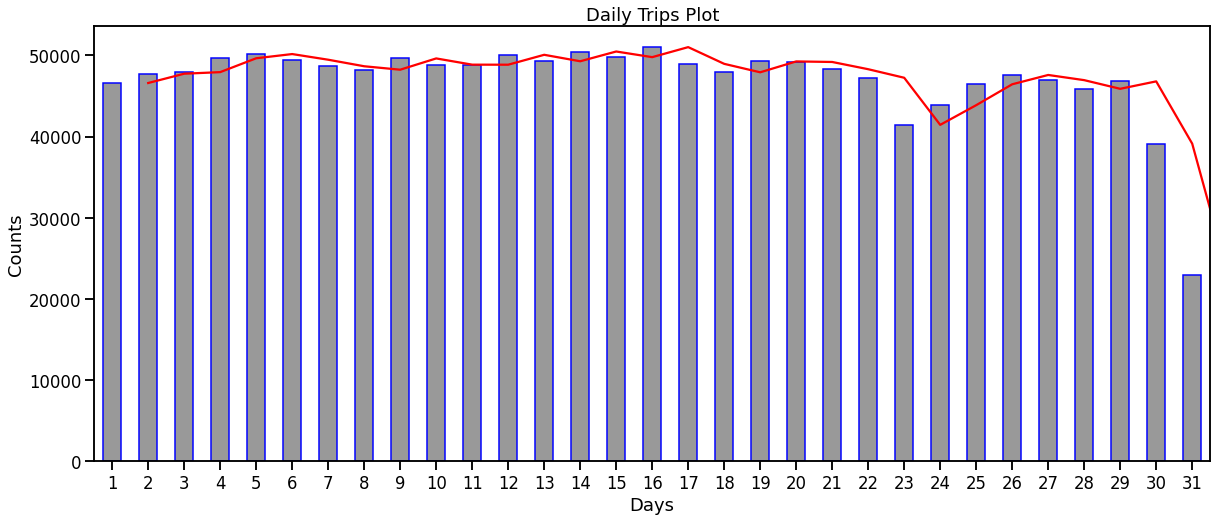

In [33]:
#Analyzing Daily trip

plt.figure(figsize=(20,8))
pickup_day = df['pickup_day'].value_counts()
pickup_day.sort_index().plot(kind='line',color = 'red')
pickup_day.sort_index().plot(kind='bar',edgecolor='blue',color = '0.6')
plt.xticks(rotation=0)



plt.title('Daily Trips Plot')
plt.xlabel('Days')
plt.ylabel('Counts')

In [34]:
sorted(df['pickup_month'].unique())

[1, 2, 3, 4, 5, 6]

Text(0.5, 1.0, 'Overall Monthly trips')

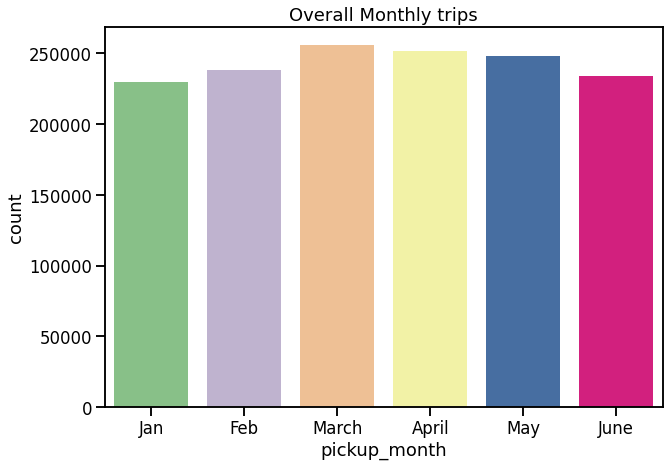

In [35]:
#monthly trips exploration

plt.figure(figsize=(10,7))
sns.countplot(df['pickup_month'], palette='Accent')
plt.xticks([0,1,2,3,4,5], labels=['Jan','Feb','March','April','May','June'])
plt.title('Overall Monthly trips')

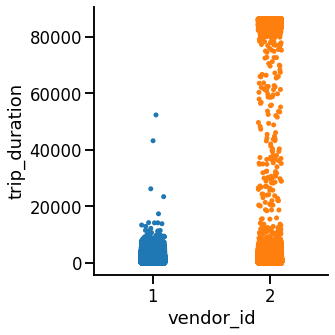

In [36]:
# Trip Duration per Vendor estimator=np.mean
sns.catplot(x="vendor_id", y="trip_duration",kind="strip",data=df)

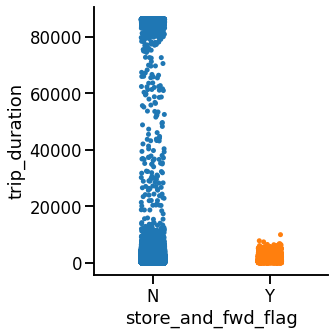

In [37]:
# Trip Duration per Store and Forward Flag
sns.catplot(y='trip_duration',x='store_and_fwd_flag',data=df,kind='strip')

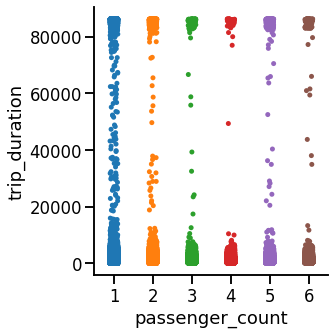

In [38]:
# Trip Duration per hour
sns.catplot(y='trip_duration',x='passenger_count',data=df,kind='strip')

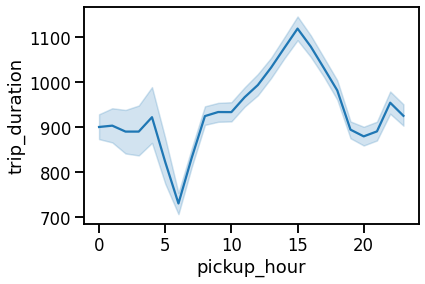

In [39]:
# Trip Duration per time of day
sns.lineplot(x='pickup_hour',y='trip_duration',data=df)

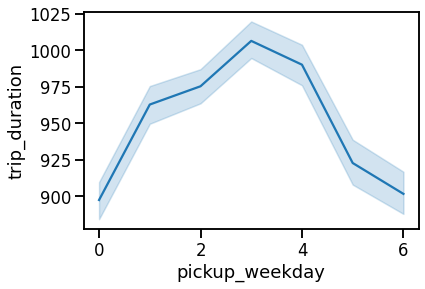

In [40]:
# Trip Duration per Day of Week
sns.lineplot(x='pickup_weekday',y='trip_duration',data=df)

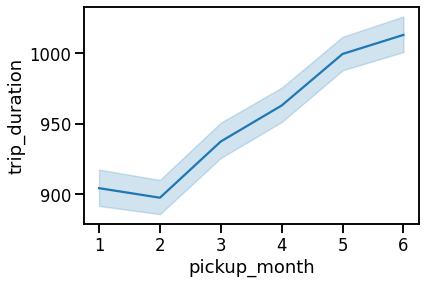

In [41]:
# Trip Duration per month
sns.lineplot(x='pickup_month',y='trip_duration',data=df)

In [43]:
#Label Encoding Features having Categorical Values

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
df['store_and_fwd_flag'] = enc.fit_transform(df['store_and_fwd_flag'])
df['vendor_id'] = enc.fit_transform(df['vendor_id'])

Text(0.5, 1.0, 'Correlation Plot')

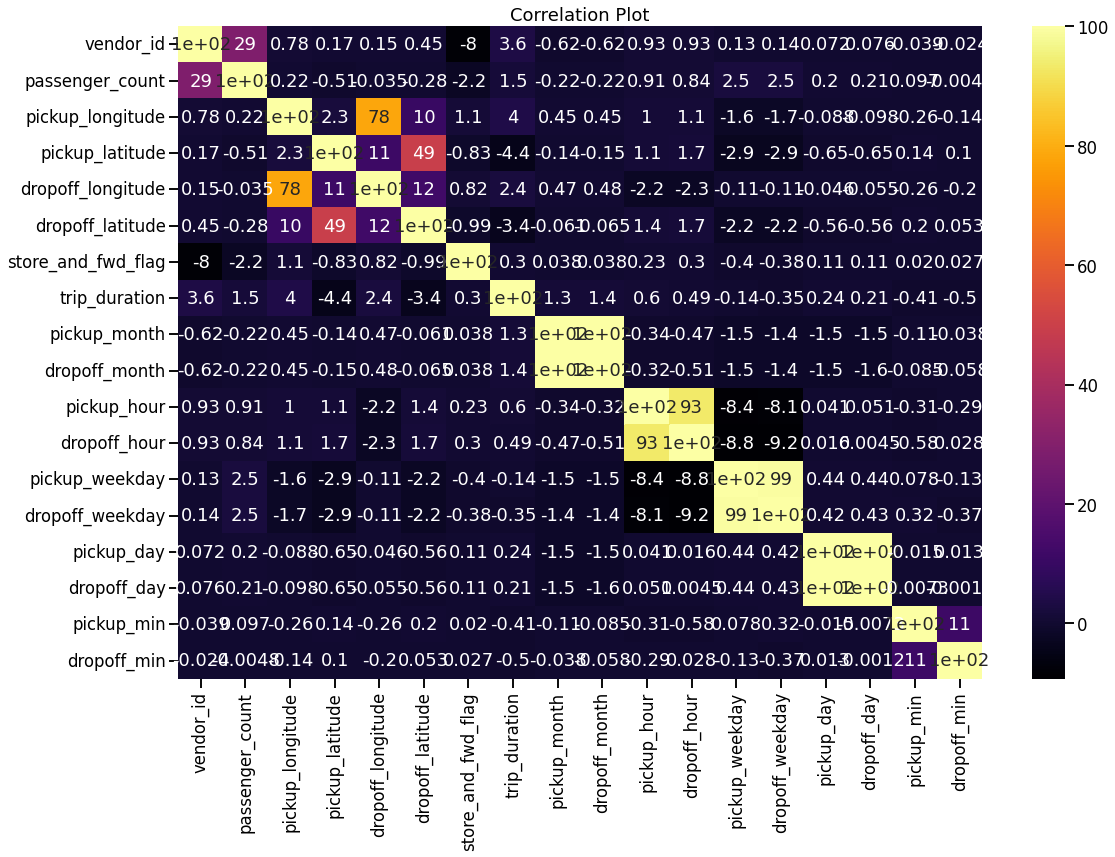

In [44]:
# Plotting Pearson Correlation heatmap

plt.figure(figsize=(18,12))
sns.heatmap(df.corr()*100, annot=True, cmap='inferno')
plt.title('Correlation Plot')

In [46]:
nyc_taxi_df = df.drop(['id','pickup_datetime','pickup_date','dropoff_datetime'], axis=1)
nyc_taxi_df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,dropoff_month,pickup_hour,dropoff_hour,pickup_weekday,dropoff_weekday,pickup_day,dropoff_day,pickup_min,dropoff_min
0,1,1,-73.982155,40.767937,-73.964630,40.765602,0,455,3,3,17,17,0,0,14,14,24,32
1,0,1,-73.980415,40.738564,-73.999481,40.731152,0,663,6,6,0,0,6,6,12,12,43,54
2,1,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,1,1,11,12,1,1,19,19,35,10
3,1,1,-74.010040,40.719971,-74.012268,40.706718,0,429,4,4,19,19,2,2,6,6,32,39
4,1,1,-73.973053,40.793209,-73.972923,40.782520,0,435,3,3,13,13,5,5,26,26,30,38


In [47]:
nyc_taxi_df.shape


(1458575, 18)

In [48]:
#Predictors and Target Variable

X = nyc_taxi_df.drop(['trip_duration'], axis=1)
y = np.log(nyc_taxi_df['trip_duration'])

In [50]:
from sklearn.preprocessing import StandardScaler
cols = X.columns
print(cols)

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'pickup_month', 'dropoff_month', 'pickup_hour', 'dropoff_hour',
       'pickup_weekday', 'dropoff_weekday', 'pickup_day', 'dropoff_day',
       'pickup_min', 'dropoff_min'],
      dtype='object')


In [51]:
scaler = StandardScaler()
print(scaler)

StandardScaler()


In [52]:
new_df = scaler.fit_transform(X)
new_df.shape

(1458575, 17)

In [53]:
new_df = pd.DataFrame(new_df, columns=cols)
new_df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_month,dropoff_month,pickup_hour,dropoff_hour,pickup_weekday,dropoff_weekday,pickup_day,dropoff_day,pickup_min,dropoff_min
0,0.932376,-0.505698,-0.122246,0.517488,0.124378,0.384565,-0.074459,-0.307453,-0.307634,0.530258,0.524555,-1.561057,-1.561081,-0.172829,-0.172879,-0.322670,0.136133
1,-1.072528,-0.505698,-0.097712,-0.375858,-0.368965,-0.575340,-0.074459,1.477163,1.476791,-2.126171,-2.097458,1.509521,1.505478,-0.402632,-0.402682,0.774026,1.399030
2,0.932376,-0.505698,-0.078128,0.395900,-0.451801,-1.162274,-0.074459,-1.497197,-1.497250,-0.407305,-0.246625,-1.049294,-1.049988,0.401676,0.401628,0.312259,-1.126764
3,0.932376,-0.505698,-0.515547,-0.941334,-0.549973,-1.256128,-0.074459,0.287419,0.287175,0.842779,0.833027,-0.537531,-0.538895,-1.092039,-1.092091,0.139097,0.537964
4,0.932376,-0.505698,0.006128,1.286113,0.006982,0.855961,-0.074459,-0.307453,-0.307634,-0.094784,-0.092389,0.997758,0.994385,1.205984,1.205938,0.023655,0.480560


In [54]:
X = new_df

In [55]:
#Applying PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=len(nyc_taxi_df.columns)-1)
pca.fit_transform(X)
var_rat = pca.explained_variance_ratio_
var_rat

array([1.26453537e-01, 1.19382116e-01, 1.15850404e-01, 1.10255386e-01,
       1.04826966e-01, 8.27645431e-02, 7.66156802e-02, 6.55522558e-02,
       5.81093704e-02, 5.20876958e-02, 4.15381163e-02, 2.98929795e-02,
       1.22976185e-02, 3.89385066e-03, 3.51734590e-04, 1.27730106e-04,
       1.64220363e-08])

<BarContainer object of 17 artists>

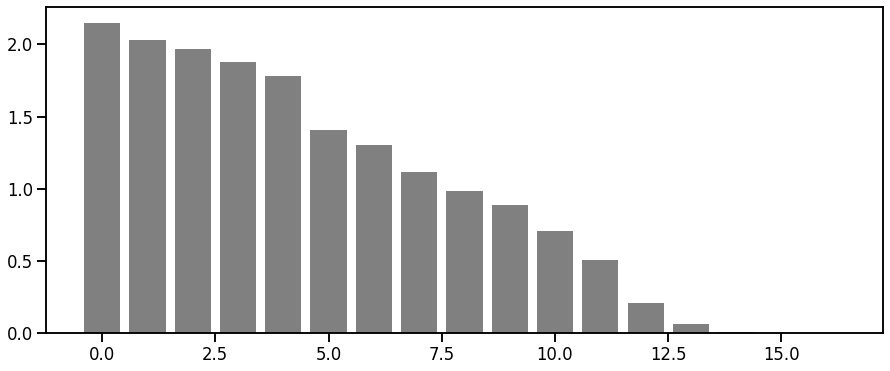

In [56]:
#Variance Ratio vs PC plot

plt.figure(figsize=(15,6))
plt.bar(np.arange(pca.n_components_), pca.explained_variance_, color="grey")

Text(0.5, 1.0, 'Elbow Plot')

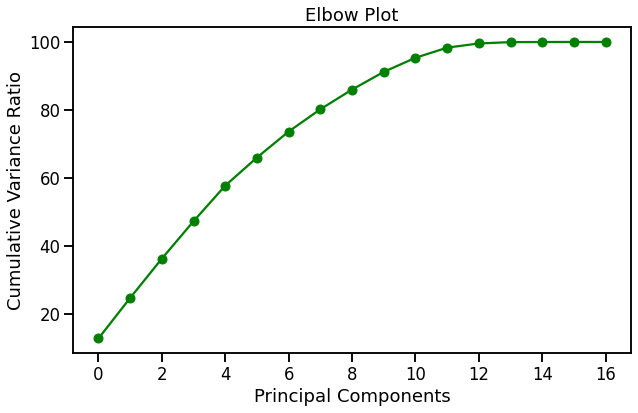

In [57]:
#Cumulative Variance Ratio

plt.figure(figsize=(10,6))
plt.plot(np.cumsum(var_rat)*100, color="g", marker='o')
plt.xlabel("Principal Components")
plt.ylabel("Cumulative Variance Ratio")
plt.title('Elbow Plot')

In [59]:

pca = PCA(n_components=12)
transform = pca.fit_transform(X)
pca.explained_variance_

array([2.1497116 , 2.02949736, 1.96945821, 1.87434285, 1.78205964,
       1.4069982 , 1.30246746, 1.11438911, 0.98785997, 0.88549143,
       0.70614846, 0.508181  ])

In [60]:
#Passing in Transformed values as Predcitors

X = transform
y = np.log(nyc_taxi_df['trip_duration']).values

In [61]:
#importing train test split & some important metrics

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_log_error , mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1021002, 12), (437573, 12), (1021002,), (437573,))

In [62]:
#implementing Linear regression

from sklearn.linear_model import LinearRegression

est_lr = LinearRegression()
est_lr.fit(X_train, y_train)
lr_pred = est_lr.predict(X_test)
lr_pred

array([6.60730673, 6.73018042, 6.34298622, ..., 6.56786014, 6.35823769,
       6.4122349 ])

In [64]:
#examining scores

print ("Training Score : " , est_lr.score(X_train, y_train))

print ("Validation Score : ", est_lr.score(X_test, y_test))

print ("Cross Validation Score : " , cross_val_score(est_lr, X_train, y_train, cv=5).mean())

print ("R2_Score : ", r2_score(lr_pred, y_test))

#print ("RMSE : ", np.sqrt(mean_squared_log_error(lr_pred, y_test)))

Training Score :  0.03899016879751682
Validation Score :  0.05105023842678713
Cross Validation Score :  0.03303095967833412
R2_Score :  -34.84345130272144


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


Text(0.5, 1.0, 'Test VS Prediction')

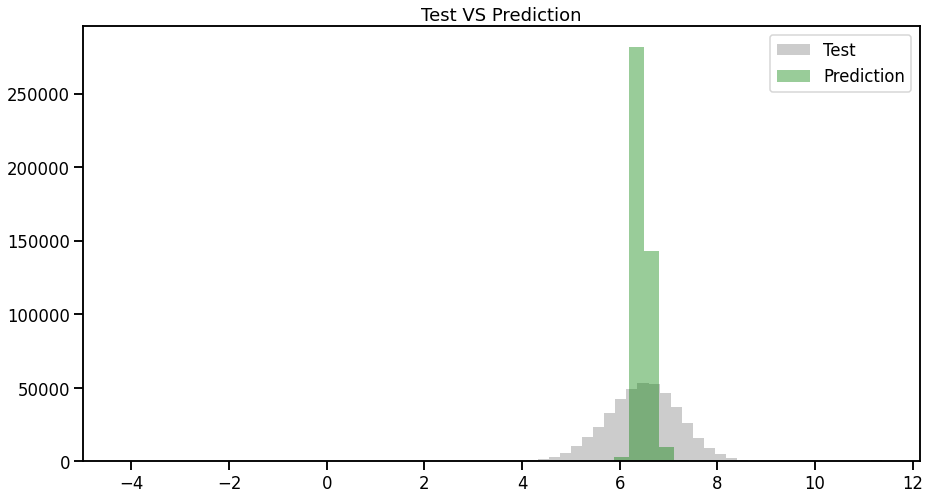

In [65]:
#prediction vs real data

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="grey", label="Test")

plt.subplot(1,1,1)
sns.distplot(lr_pred, kde=False, color="green", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

In [66]:
#implementation of decision tree

from sklearn.tree import DecisionTreeRegressor

est_dt = DecisionTreeRegressor(criterion="mse", max_depth=10)
est_dt.fit(X_train, y_train)
dt_pred = est_dt.predict(X_test)
dt_pred

array([6.86745026, 8.1662176 , 5.48610979, ..., 4.84303015, 6.73562105,
       6.73434021])

In [67]:
#examining metrics

print ("Training Score : " , est_dt.score(X_train, y_train))

print ("Validation Score : ", est_dt.score(X_test, y_test))

print ("Cross Validation Score : " , cross_val_score(est_dt, X_train, y_train, cv=5).mean())

print ("R2_Score : ", r2_score(dt_pred, y_test))

print ("RMSE : ", np.sqrt(mean_squared_log_error(dt_pred, y_test)))

Training Score :  0.9507264895276575
Validation Score :  0.9426710069407246
Cross Validation Score :  0.9415258578993762
R2_Score :  0.9394656747491913
RMSE :  0.03019952465755549


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


Text(0.5, 1.0, 'Test VS Prediction')

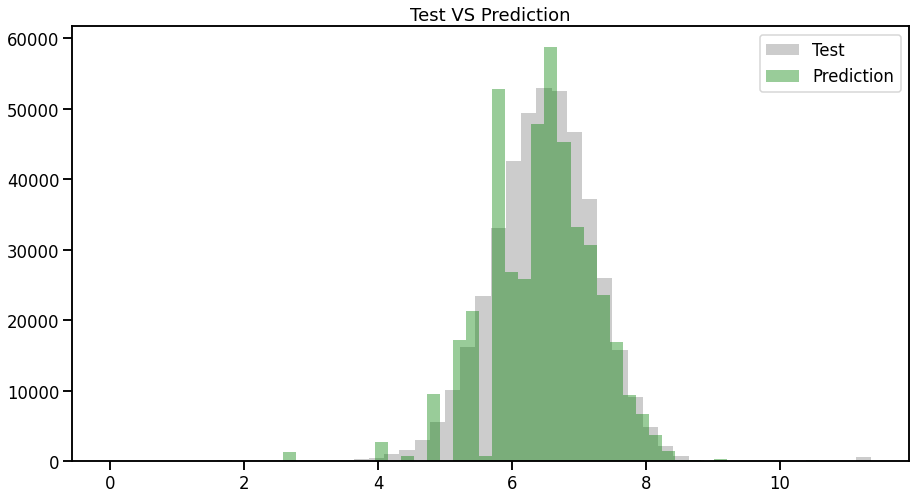

In [68]:
#prediction vs real data

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="grey", label="Test")

plt.subplot(1,1,1)
sns.distplot(dt_pred, kde=False, color="green", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

In [69]:
#Random forest implementation

from sklearn.ensemble import RandomForestRegressor

est_rf = RandomForestRegressor(criterion="mse", n_estimators=5, max_depth=10)
est_rf.fit(X_train, y_train)
rf_pred = est_rf.predict(X_test)
rf_pred

array([6.86700251, 8.18445511, 5.48707773, ..., 4.84297444, 6.73543422,
       6.73398479])

In [70]:
#examining metrics 

print ("Training Score : " , est_rf.score(X_train, y_train))

print ("Validation Score : ", est_rf.score(X_test, y_test))

print ("Cross Validation Score : " , cross_val_score(est_rf, X_train, y_train, cv=5).mean())

print ("R2_Score : ", r2_score(rf_pred, y_test))

print ("RMSE : ", np.sqrt(mean_squared_log_error(rf_pred, y_test)))

Training Score :  0.9523854360350967
Validation Score :  0.9458533622550931
Cross Validation Score :  0.9453811048019652
R2_Score :  0.9425739563974012
RMSE :  0.02953741192865431


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


Text(0.5, 1.0, 'Test VS Prediction')

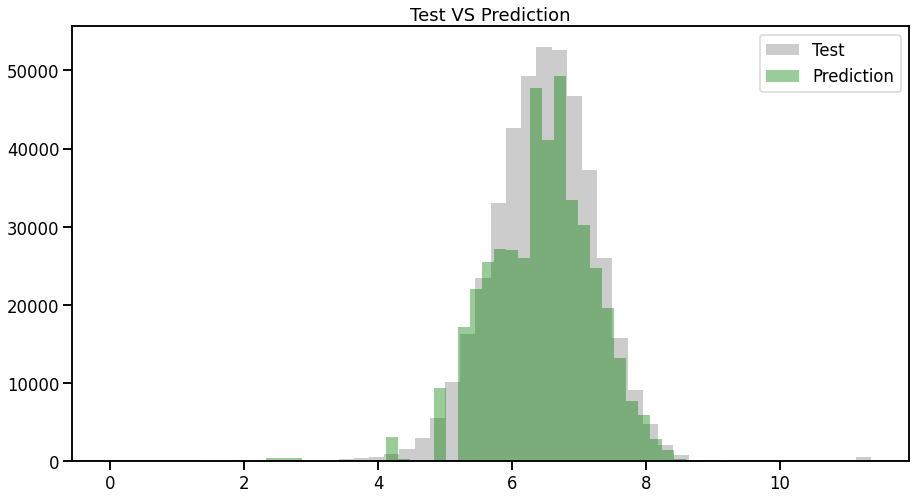

In [71]:
#prediction vs real data

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="grey", label="Test")

plt.subplot(1,1,1)
sns.distplot(rf_pred, kde=False, color="green", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

Text(0.5, 1.0, 'R2 Scores')

<Figure size 720x504 with 0 Axes>

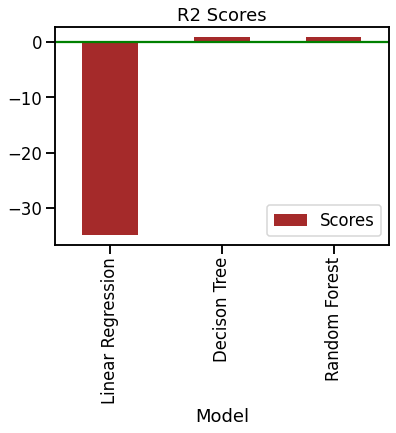

In [72]:
#r2 score plot for all 3 models

plt.figure(figsize=(10,7))
r2 = pd.DataFrame({'Scores':np.array([r2_score(lr_pred, y_test), r2_score(dt_pred, y_test), r2_score(rf_pred, y_test)]), 'Model':np.array(['Linear Regression', 'Decison Tree', 'Random Forest'])})
r2.set_index('Model').plot(kind="bar", color="brown")
plt.axhline(y=0, color='g')
plt.title("R2 Scores")

Text(0.5, 1.0, 'RMSE - Lesser is Better')

<Figure size 720x720 with 0 Axes>

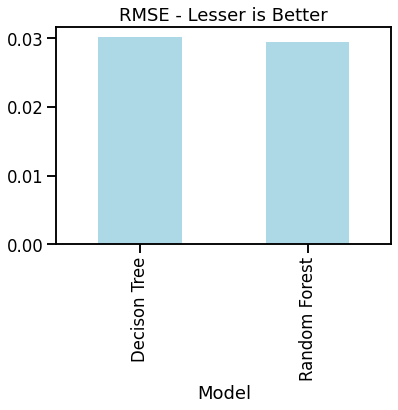

In [73]:
#RMSE plot

plt.figure(figsize=(10,10))
r2 = pd.DataFrame({'RMSE':np.array([np.sqrt(mean_squared_log_error(dt_pred, y_test)), np.sqrt(mean_squared_log_error(rf_pred, y_test))]), 'Model':np.array(['Decison Tree', 'Random Forest'])})
r2.set_index('Model').plot(kind="bar", color="lightblue", legend=False)
plt.title("RMSE - Lesser is Better")

In [74]:
#train test split

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_log_error , mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1021002, 12), (437573, 12), (1021002,), (437573,))

In [75]:
#implenting linear regression

from sklearn.linear_model import LinearRegression

est_lr = LinearRegression()
est_lr.fit(X_train, y_train)
lr_pred = est_lr.predict(X_test)
lr_pred

array([6.60730673, 6.73018042, 6.34298622, ..., 6.56786014, 6.35823769,
       6.4122349 ])

In [76]:

print ("Training Score : " , est_lr.score(X_train, y_train))

print ("Validation Score : ", est_lr.score(X_test, y_test))

print ("Cross Validation Score : " , cross_val_score(est_lr, X_train, y_train, cv=5).mean())

print ("R2_Score : ", r2_score(lr_pred, y_test))

#print ("RMSE : ", np.sqrt(mean_squared_log_error(lr_pred, y_test)))

Training Score :  0.03899016879751682
Validation Score :  0.05105023842678713
Cross Validation Score :  0.03303095967833412
R2_Score :  -34.84345130272144


In [77]:
params = {'max_depth':[10,11,12,None], "min_samples_split":[2,3,4,5], 'max_features':[2,5,7,10]}

grid = GridSearchCV(est_dt, params, cv=5)
grid.fit(X_train, y_train)
grid_pred = grid.predict(X_test)
print (grid_pred)
grid.best_params_

[6.86780736 8.18690028 5.48626943 ... 4.83267431 6.7318193  6.73428762]


{'max_depth': 11, 'max_features': 10, 'min_samples_split': 4}

In [78]:
print ("Training Score : " , grid.score(X_train, y_train))

print ("Validation Score : ", grid.score(X_test, y_test))

print ("R2_Score after parameter tuning : ", r2_score(grid_pred, y_test))

print ("RMSE after parameter tuning : ", np.sqrt(mean_squared_log_error(grid_pred, y_test)))

Training Score :  0.9535448497433802
Validation Score :  0.9443206920936272
R2_Score after parameter tuning :  0.9413374636182534
RMSE after parameter tuning :  0.029666032690749064


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


Text(0.5, 1.0, 'Test VS Prediction')

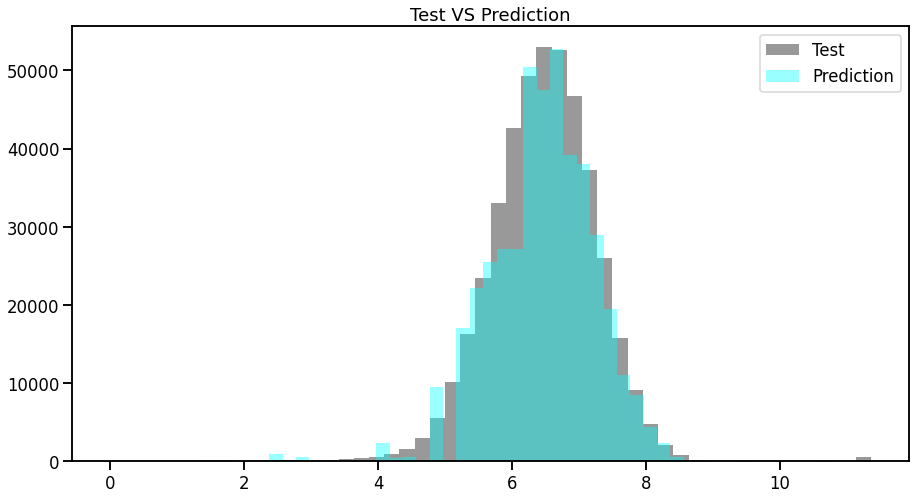

In [79]:
#prediction vs reality check

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(grid_pred, kde=False, color="cyan", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")


In [80]:
from sklearn.ensemble import RandomForestRegressor

est_rf = RandomForestRegressor(criterion="mse", n_estimators=5, max_depth=10)
est_rf.fit(X_train, y_train)
rf_pred = est_rf.predict(X_test)
rf_pred

array([6.86737687, 8.17717849, 5.48674842, ..., 4.8408932 , 6.73499555,
       6.73425667])

In [81]:
#examining metrics

print ("Training Score : " , est_rf.score(X_train, y_train))

print ("Validation Score : ", est_rf.score(X_test, y_test))

print ("Cross Validation Score : " , cross_val_score(est_rf, X_train, y_train, cv=5).mean())

print ("R2_Score : ", r2_score(rf_pred, y_test))

print ("RMSE : ", np.sqrt(mean_squared_log_error(rf_pred, y_test)))

Training Score :  0.9516348660190876
Validation Score :  0.9456919711429453
Cross Validation Score :  0.9457972751304788
R2_Score :  0.9423575613570173
RMSE :  0.02958148747105807


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


Text(0.5, 1.0, 'Test VS Prediction')

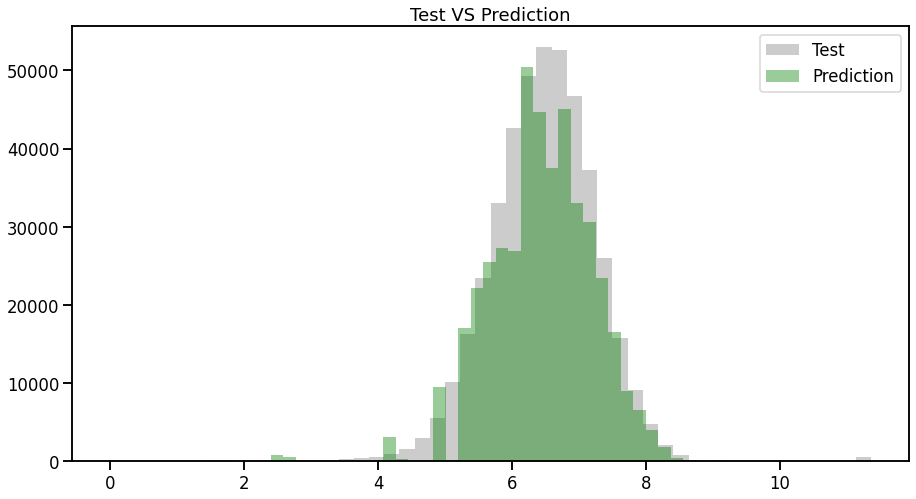

In [82]:
#prediction vs reality check

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="grey", label="Test")

plt.subplot(1,1,1)
sns.distplot(rf_pred, kde=False, color="green", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

Text(0.5, 1.0, 'RMSE - Lesser is Better')

<Figure size 576x504 with 0 Axes>

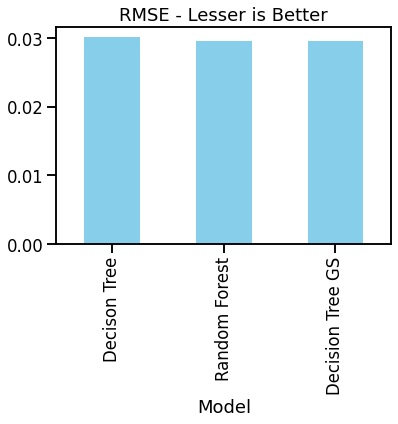

In [83]:
#RMSE plot

plt.figure(figsize=(8,7))
r2 = pd.DataFrame({'RMSE':np.array([np.sqrt(mean_squared_log_error(dt_pred, y_test)), np.sqrt(mean_squared_log_error(rf_pred, y_test)),np.sqrt(mean_squared_log_error(grid_pred, y_test))]), 'Model':np.array(['Decison Tree', 'Random Forest','Decision Tree GS'])})
r2.set_index('Model').plot(kind="bar", color="skyblue", legend=False)
plt.title("RMSE - Lesser is Better")